Global y-axis limits: 1.9391 to 3.0442299999999998


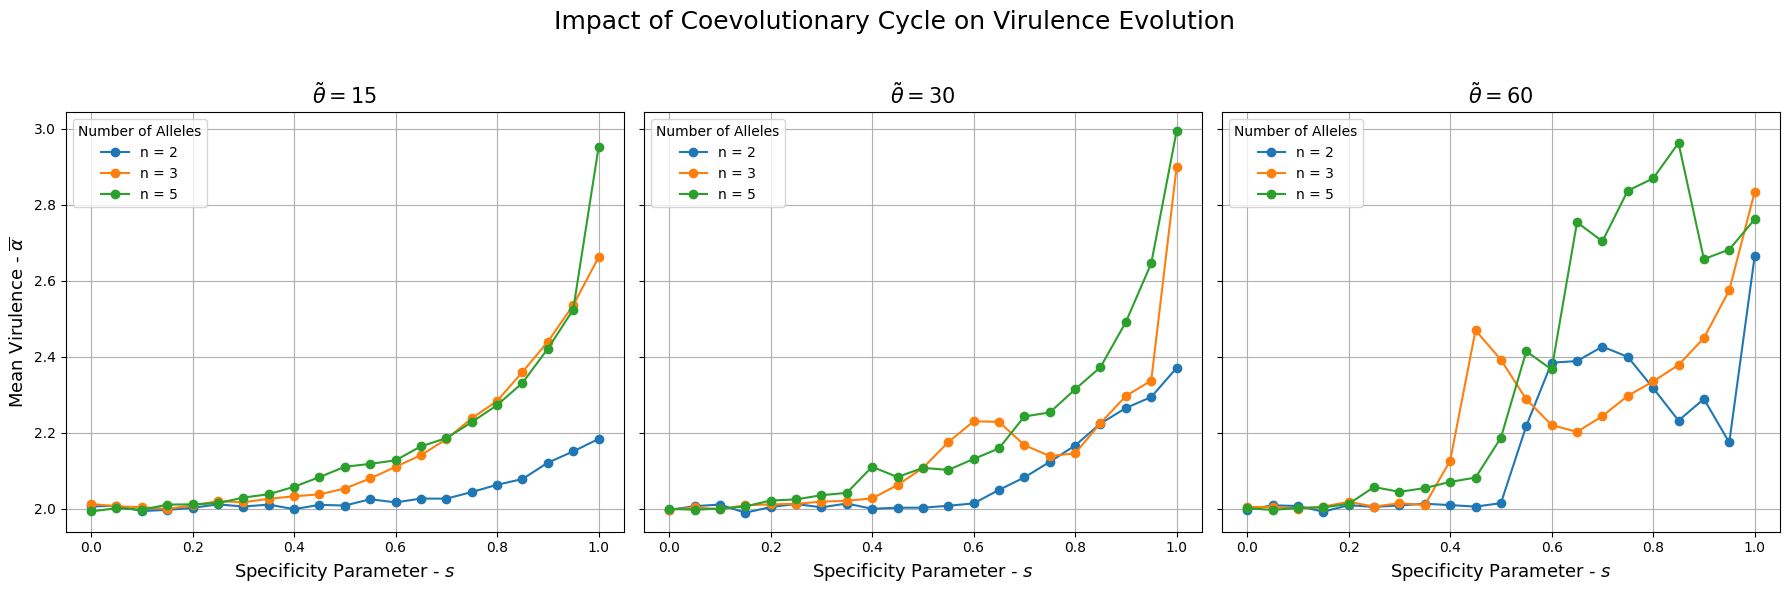

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of directories (each corresponding to a different theta value)
directories = ["theta15", "theta30", "theta60"]

# List of CSV files and the corresponding allele number for each file.
allele_files = [
    ("specificity_sweep_results_n=2.csv", 2),
    ("specificity_sweep_results_n=3.csv", 3),
    ("specificity_sweep_results_n=5.csv", 5)
]

# First, compute the global y-axis limits across all files.
global_min = float('inf')
global_max = -float('inf')

for d in directories:
    for filename, n_value in allele_files:
        fullpath = os.path.join(d, filename)
        try:
            data = pd.read_csv(fullpath)
            if data.empty:
                print(f"Warning: {fullpath} is empty. Skipping.")
                continue
            current_min = data['MeanAlpha'].min()
            current_max = data['MeanAlpha'].max()
            if current_min < global_min:
                global_min = current_min
            if current_max > global_max:
                global_max = current_max
        except pd.errors.EmptyDataError:
            print(f"Warning: {fullpath} is empty. Skipping.")
            continue

global_min -= 0.05
global_max += 0.05

print(f"Global y-axis limits: {global_min} to {global_max}")

# Create a single figure with 1 row and 3 columns.
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop over directories and plot each in its corresponding subplot.
for ax, d in zip(axes, directories):
    for filename, n_value in allele_files:
        fullpath = os.path.join(d, filename)
        try:
            data = pd.read_csv(fullpath)
            if data.empty:
                print(f"Warning: {fullpath} is empty. Skipping plotting for this file.")
                continue
            data = data.sort_values(by='s')
            ax.plot(data['s'], data['MeanAlpha'], marker='o', linestyle='-', label=f'n = {n_value}')
        except pd.errors.EmptyDataError:
            print(f"Warning: {fullpath} is empty. Skipping plotting for this file.")
            continue
    # Extract the theta value from the directory name.
    theta_val = d.replace("theta", "")
    # Use double curly braces to escape the literal braces for LaTeX formatting.
    ax.set_title(r'$\tilde{{\theta}} = {}$'.format(theta_val), fontsize=15)
    ax.set_xlabel('Specificity Parameter - $s$', fontsize=13)
    ax.grid(True)
    ax.legend(title='Number of Alleles')

# Set common y-axis label and limits
axes[0].set_ylabel('Mean Virulence - $\\overline{\\alpha}$', fontsize=13)
plt.ylim(global_min, global_max)
plt.suptitle('Impact of Coevolutionary Cycle on Virulence Evolution', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the combined figure
plt.savefig('combined_specificity_sweep.png', dpi=500)
plt.show()
